<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
Здравствуй Владислав!<br>
Это Николай. И нам повезло - мы делаем интереснейший проект!<br>
Далее, я постарюсь прокомментировать сделанные шаги.<br>
Вперёд!
        
Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
        
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

In [1]:
!pip install torch==1.10.0+cpu torchvision==0.11.0+cpu torchaudio==0.10.0 -f https://download.pytorch.org/whl/torch_stable.html --user -q

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install catboost -q

In [3]:
!pip install -U scikit-learn -q

In [4]:
!pip install shap -q

In [5]:
import pandas as pd
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error 
import shap 

warnings.filterwarnings('ignore')
RANDOM_STATE = 77

## Загрузка и изучение данных

In [6]:
df_arc = pd.read_csv('/datasets/data_arc_new.csv')
df_bulk = pd.read_csv('/datasets/data_bulk_new.csv')
df_bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv')
df_gas = pd.read_csv('/datasets/data_gas_new.csv')
df_temp = pd.read_csv('/datasets/data_temp_new.csv')
df_wire = pd.read_csv('/datasets/data_wire_new.csv')
df_wire_time = pd.read_csv('/datasets/data_wire_time_new.csv')

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>ОК, данные на базе)</p>
</div>

### Данные об электродах

In [7]:
df_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543


In [8]:
df_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [9]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


1. Пропусков нет.
2. Нужно изменить тип данных даты на datetime.
3. Изменить названия столбцов.
4. Избавиться от выбороов.
5. Сгенерировать новые признаки. 

In [10]:
df_arc.columns=['key', 's_time_arc', 'f_time_arc', 'act_power', 'react_power']

In [11]:
df_arc[df_arc.react_power<0]

,key,s_time_arc,f_time_arc,act_power,react_power
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


Один выброс. Скорее всего ошибка ввода или выгрузки данных. Что бы не терять партию, просто заменим на произведение активной мощности на отношение реактивной мощности к активной. 

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>явно выброс. Причём, удалять лучше всю партию.</p>
</div>

In [12]:
(df_arc.query('index != 9780')['react_power'] / df_arc.query('index != 9780')['act_power']).mean().round(2)

0.73

In [13]:
df_arc.loc[df_arc['react_power'] < 0, 'react_power'] = df_arc['act_power'] * 0.73

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Ну или так вставить, отлично.</p>
</div>

In [14]:
df_arc['s_time_arc'] = pd.to_datetime(df_arc['s_time_arc'])
df_arc['f_time_arc'] = pd.to_datetime(df_arc['f_time_arc'])

Меняем тип данных.

In [15]:
df_arc.key.unique()

array([   1,    2,    3, ..., 3239, 3240, 3241])

In [16]:
df_arc.key.nunique()

3214

In [17]:
df_arc['time_power'] = (df_arc.f_time_arc - df_arc.s_time_arc).astype('timedelta64[s]')
df_arc['total_power'] = np.sqrt(df_arc.act_power**2+df_arc.react_power**2)

Новые признаки. 
1. `time_power` - полное время нагрева дуги (в секундах)
2. `total_power` - полная мощность. Корень из суммы квадратов активной и реактивной мощностей.

Была еще идея добавить работу как произведение мощности на время. Но они мультиколлениарны. Пробовал оставлять отдельно эти два признака и отдельно работу. Time_power и total_power показали себя лучше. 

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА 2</b></u></p>
    <p>заработало! А по факторам - тут действительно можно по всякому) на вебинаре этому вопросу уделили тоже время. ОК.</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>упс(( не пошло...</p>
</div>

In [18]:
func_arc = {
    'key'            : 'count', 
    's_time_arc'     : 'first',
    'f_time_arc'     : 'last',
    'act_power'      : 'sum',
    'react_power'    : 'sum',
    'time_power'     : 'sum',
    'total_power'    : 'sum'
}

In [19]:
final_arc = df_arc.groupby('key').agg(func_arc).rename(columns={'key':'count'})

In [20]:
final_arc

,count,s_time_arc,f_time_arc,act_power,react_power,time_power,total_power
key,,,,,,,
1,5,2019-05-03 11:02:14,2019-05-03 11:28:37,3.036730,2.142821,1098.0,3.718736
2,4,2019-05-03 11:34:14,2019-05-03 11:53:18,2.139408,1.453357,811.0,2.588349
3,5,2019-05-03 12:06:54,2019-05-03 12:32:19,4.063641,2.937457,655.0,5.019223
4,4,2019-05-03 12:39:37,2019-05-03 12:57:50,2.706489,2.056992,741.0,3.400038
5,4,2019-05-03 13:11:13,2019-05-03 13:33:55,2.252950,1.687991,869.0,2.816980
...,...,...,...,...,...,...,...
3237,5,2019-09-06 11:31:25,2019-09-06 11:53:55,2.541872,2.025417,909.0,3.250657
3238,3,2019-09-06 12:16:25,2019-09-06 12:31:35,1.374821,1.038103,546.0,1.723937
3239,8,2019-09-06 14:17:00,2019-09-06 15:05:50,4.848005,3.541541,1216.0,6.014480


Группируем данные по номеру партии, что дает нам обобщенные данные для каждой отдельной партии. 

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Такт-то, новые факторы - по делу организованы, ОК.</p>
</div>

###  Данные о подаче сыпучих материалов (объём)

In [21]:
df_bulk

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


In [22]:
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [23]:
df_bulk.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


1. Пропусков много. (Для каждой партии набор дабавок разный). Так же нет смысл использовать bulk_8 т.к. он использовался всего один раз.
2. Нужно изменить названия столбцов. 
3. С типом данных все в порядке.
4. Добавить новые признаки. 

In [24]:
df_bulk = df_bulk.set_index('key')

Делаем столбец `key` индексом для дальнейшего объединения таблиц по нему.

In [25]:
df_bulk.columns = [x.replace(' ','_').lower() for x in  df_bulk.columns]

In [26]:
df_bulk['count_bulk'] = df_bulk.count(axis=1)
df_bulk['bulk_sum'] = df_bulk.sum(axis=1) - df_bulk['count_bulk']
df_bulk = df_bulk.drop('bulk_8', axis=1)

Генерируем новые признаки. 
1. `count_bulk` - количество добавок в партии. 
2. `bulk_sum` - сумм добавляемых добавок.   

bulk_8 - удален.

In [27]:
final_bulk = df_bulk.fillna(0)

Пропуски заменяем на 0.

In [28]:
final_bulk.head(10)

,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,count_bulk,bulk_sum
key,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,4,553.0
2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,4,582.0
3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,4,544.0
4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,4,595.0
5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,4,584.0
6,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,204.0,0.0,201.0,154.0,4,676.0
7,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,204.0,0.0,152.0,154.0,4,627.0
8,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,410.0,0.0,252.0,153.0,4,914.0
9,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,99.0,203.0,4,526.0


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>ОК, согласен с обработкой.</p>
</div>

### Данные о продувке сплава газом

In [29]:
df_gas

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
...,...,...
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103


In [30]:
df_gas.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [31]:
df_gas.duplicated('key').sum()

0

In [32]:
df_gas.isna().sum()

key      0
Газ 1    0
dtype: int64

1. Пропусков нет. 
2. `key` делаем индексом.

In [33]:
final_gas = df_gas.set_index('key')

In [34]:
final_gas.columns = ['gas']

In [35]:
final_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3239 entries, 1 to 3241
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gas     3239 non-null   float64
dtypes: float64(1)
memory usage: 50.6 KB


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>и тут согласен.</p>
</div>

### Данные о проволочных материалах (объём)

In [36]:
df_wire

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [38]:
df_wire.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


Повторяем все то же, что и делали с таблицей bulk.


In [39]:
df_wire = df_wire.set_index('key')

In [40]:
df_wire.columns = [x.replace(' ','_').lower() for x in  df_wire.columns]

In [41]:
df_wire['count_wire'] = df_wire.count(axis=1)
df_wire['wire_sum'] = df_wire.sum(axis=1) - df_wire['count_wire']
final_wire = df_wire.drop('wire_5', axis=1)
final_wire = final_wire.fillna(0)

In [42]:
final_wire

,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,count_wire,wire_sum
key,,,,,,,,,,
1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,60.059998
2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,96.052315
3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,91.160157
4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,89.063515
5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,2,98.352796
...,...,...,...,...,...,...,...,...,...,...
3237,38.088959,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,38.088959
3238,56.128799,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,56.128799
3239,143.357761,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,143.357761


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>и тут - понятно.</p>
</div>

### Результаты измерения температуры

In [43]:
df_temp

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN


In [44]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [45]:
df_temp.describe()

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


1. Присутствуют пропуски. Заменяем на нули. Берем только первый и последний замер температуры у партии. Первый замер будет признаком, а последний - целевым признаком.
2. Избавиться от выбросов. (значения температуры ниже 1400гр.)
3. сгенерировать новые признаки.

In [46]:
df_temp = df_temp.fillna(0)

In [47]:
df_temp.columns = ['key', 'time', 'temp']

In [48]:
df_temp

,key,time,temp
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
18087,3241,2019-09-06 16:55:01,0.0
18088,3241,2019-09-06 17:06:38,0.0
18089,3241,2019-09-06 17:21:48,0.0
18090,3241,2019-09-06 17:24:44,0.0


In [49]:
agg_temp_1 = {
    'time': 'first',
    'temp': 'first'
}

agg_temp_2 = {
    'time': 'last',
    'temp': 'last'
}

df_temp_gb = df_temp.groupby('key').agg(agg_temp_1)
df_temp_gb.columns = ['first_time', 'first_temp']
df_temp_gb_1 = df_temp.groupby('key').agg(agg_temp_2)
df_temp_gb_1.columns = ['last_time', 'last_temp']

In [50]:
final_temp = df_temp_gb.merge(df_temp_gb_1, on='key', how='left')

Группируем по ключу. Берем время и температуру первого замера, и время и температуру последнего замера. 

In [51]:
final_temp

,first_time,first_temp,last_time,last_temp
key,,,,
1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0
2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0
3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0
4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0
5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0
...,...,...,...,...
3237,2019-09-06 11:31:15,1569.0,2019-09-06 11:55:45,0.0
3238,2019-09-06 12:16:15,1584.0,2019-09-06 12:34:37,0.0
3239,2019-09-06 14:16:50,1598.0,2019-09-06 15:09:55,0.0


In [52]:
final_temp = final_temp.query('last_temp!=0')

Имеются партии с 0 в целевом признаке. Такие партия не нужны. Удаляем.

In [53]:
final_temp

,first_time,first_temp,last_time,last_temp
key,,,,
1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0
2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0
3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0
4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0
5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0
...,...,...,...,...
2495,2019-08-10 11:27:47,1570.0,2019-08-10 11:50:47,1591.0
2496,2019-08-10 11:56:48,1554.0,2019-08-10 12:25:13,1591.0
2497,2019-08-10 12:37:26,1571.0,2019-08-10 12:53:28,1589.0


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>СУПЕР! это важный момент проекта - оставить только нужные партии. принято.</p>
</div>

In [54]:
final_temp.describe()

,first_temp,last_temp
count,2477.000000,2477.000000
mean,1588.405733,1595.334275
std,29.232904,16.019339
min,1191.000000,1541.000000
25%,1572.000000,1587.000000
50%,1588.000000,1593.000000
75%,1605.000000,1599.000000
max,1679.000000,1700.000000


Есть выбросы. Ниже 1400 градусов удаляем. Выше оставляем т.к. не можем быть уверены в том, что это выбросы. 

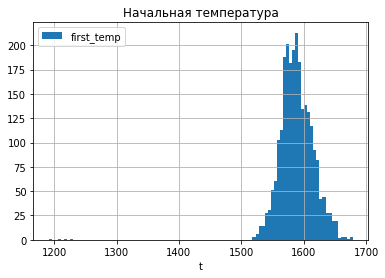

In [55]:
plt.hist(final_temp.first_temp, bins=100, label = 'first_temp')
plt.xlabel('t')
plt.legend()
plt.title('Начальная температура')
plt.grid()

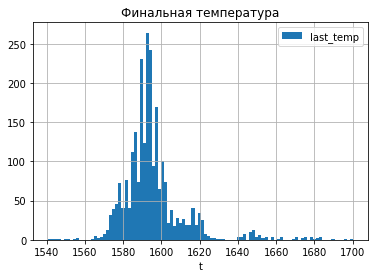

In [56]:
plt.hist(final_temp.last_temp, bins=100, label = 'last_temp')
plt.xlabel('t')
plt.legend()
plt.title('Финальная температура')
plt.grid()

In [57]:
final_temp['first_time'] = pd.to_datetime(final_temp['first_time'])
final_temp['last_time'] = pd.to_datetime(final_temp['last_time'])
final_temp['time_temp'] = (final_temp.last_time - final_temp.first_time).astype('timedelta64[s]')
final_temp = final_temp.query('1450 < first_temp and 1450 < last_temp')
final_temp

,first_time,first_temp,last_time,last_temp,time_temp
key,,,,,
1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0,1714.0
2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0,1265.0
3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0,1753.0
4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0,1220.0
5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0,1536.0
...,...,...,...,...,...
2495,2019-08-10 11:27:47,1570.0,2019-08-10 11:50:47,1591.0,1380.0
2496,2019-08-10 11:56:48,1554.0,2019-08-10 12:25:13,1591.0,1705.0
2497,2019-08-10 12:37:26,1571.0,2019-08-10 12:53:28,1589.0,962.0


Добавляем новый признак `time_temp` - время между первым и последним замером температуры. 

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>С выбросами тут действительно важный момент. Но выброс выбросу рознь) Бывает, что выброс - то реальная бизнес-практика. И если удалить их, то мы получим модель, так скажем, работующую не во всех диапазонах входящих в неё факторов. Т.е. по метрикам модель будет хорошая. А вот по бизнесу - не совсем применимая.<br>А бывают выбросы - точно выбросы - ошибки учёта данных, например.<br>

В таких проектах, также лучше использовать такую философию анализа выбросов:<br>
Ящик с усами - даёт пищу для размышлений (не более того, не воспринимаем его как сигнал к действию).<br>
А потом смотрим то явление, что изучаем. Данные значения - могут быть в реальности или нет?<br>
Вот, например, в случае с температурой плавления: по справочнику она у металла = около 1400+-, т.е. 1200 - действиетльно кажется очень странным значением. А 1450 и выше выглядит вполне рабочим, не смотря на статистические границы.<br><br>
    
По выбросам в этом проекте:: супервыбросы убираем со всей выборки (реактивная и температура менее 1400). А вот если другие выбросы будешь удалять (я бы не удалял), то давай условимся так: сделаем это только на трайн выборке. А тест будет чистая от удаления. Так мы будем близки к реальным условиям.<br>
Ведь если мы удаляем выбросы, а это не выбросы, то модель становится рабочей только на ограниченно диапазоне парамеров. Т.е. мы добъёмся хорошей метрики. Но модель при этом буде малопригодной)</p>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА 2</b></u></p>
    <p>всё на месте, принято.</p>
</div>

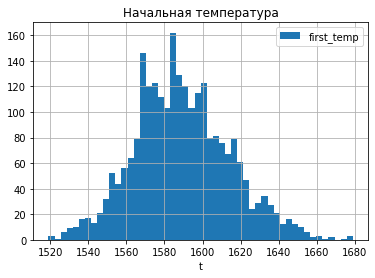

In [58]:
plt.hist(final_temp.first_temp, bins=50, label = 'first_temp')
plt.xlabel('t')
plt.legend()
plt.title('Начальная температура')
plt.grid()

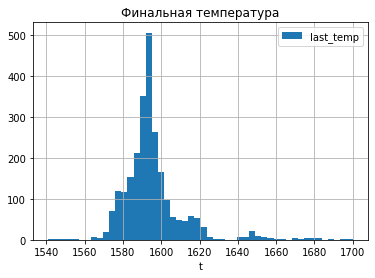

In [59]:
plt.hist(final_temp.last_temp, bins=50, label = 'last_temp')
plt.xlabel('t')
plt.legend()
plt.title('Финальная температура')
plt.grid()

### Объединение таблиц

In [60]:
df_total = final_temp.join([final_arc, final_bulk, final_gas, final_wire], how='inner')
df_total

,first_time,first_temp,last_time,last_temp,time_temp,count,s_time_arc,f_time_arc,act_power,react_power,...,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,count_wire,wire_sum
key,,,,,,,,,,,,,,,,,,,,,
1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0,1714.0,5,2019-05-03 11:02:14,2019-05-03 11:28:37,3.036730,2.142821,...,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,60.059998
2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0,1265.0,4,2019-05-03 11:34:14,2019-05-03 11:53:18,2.139408,1.453357,...,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,96.052315
3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0,1753.0,5,2019-05-03 12:06:54,2019-05-03 12:32:19,4.063641,2.937457,...,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,91.160157
4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0,1220.0,4,2019-05-03 12:39:37,2019-05-03 12:57:50,2.706489,2.056992,...,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,89.063515
5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0,1536.0,4,2019-05-03 13:11:13,2019-05-03 13:33:55,2.252950,1.687991,...,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,2,98.352796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2019-08-10 11:27:47,1570.0,2019-08-10 11:50:47,1591.0,1380.0,4,2019-08-10 11:27:57,2019-08-10 11:48:05,3.168133,2.210936,...,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,89.150879
2496,2019-08-10 11:56:48,1554.0,2019-08-10 12:25:13,1591.0,1705.0,6,2019-08-10 11:56:58,2019-08-10 12:23:07,4.174918,2.872031,...,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,114.179527
2497,2019-08-10 12:37:26,1571.0,2019-08-10 12:53:28,1589.0,962.0,3,2019-08-10 12:37:36,2019-08-10 12:51:20,3.605239,2.452092,...,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,2,103.134723


In [61]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 1 to 2499
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   first_time   2325 non-null   datetime64[ns]
 1   first_temp   2325 non-null   float64       
 2   last_time    2325 non-null   datetime64[ns]
 3   last_temp    2325 non-null   float64       
 4   time_temp    2325 non-null   float64       
 5   count        2325 non-null   int64         
 6   s_time_arc   2325 non-null   datetime64[ns]
 7   f_time_arc   2325 non-null   datetime64[ns]
 8   act_power    2325 non-null   float64       
 9   react_power  2325 non-null   float64       
 10  time_power   2325 non-null   float64       
 11  total_power  2325 non-null   float64       
 12  bulk_1       2325 non-null   float64       
 13  bulk_2       2325 non-null   float64       
 14  bulk_3       2325 non-null   float64       
 15  bulk_4       2325 non-null   float64       
 16  bulk_5

Объединяем данные по ключу. Получаем 2325 партий с данными. 

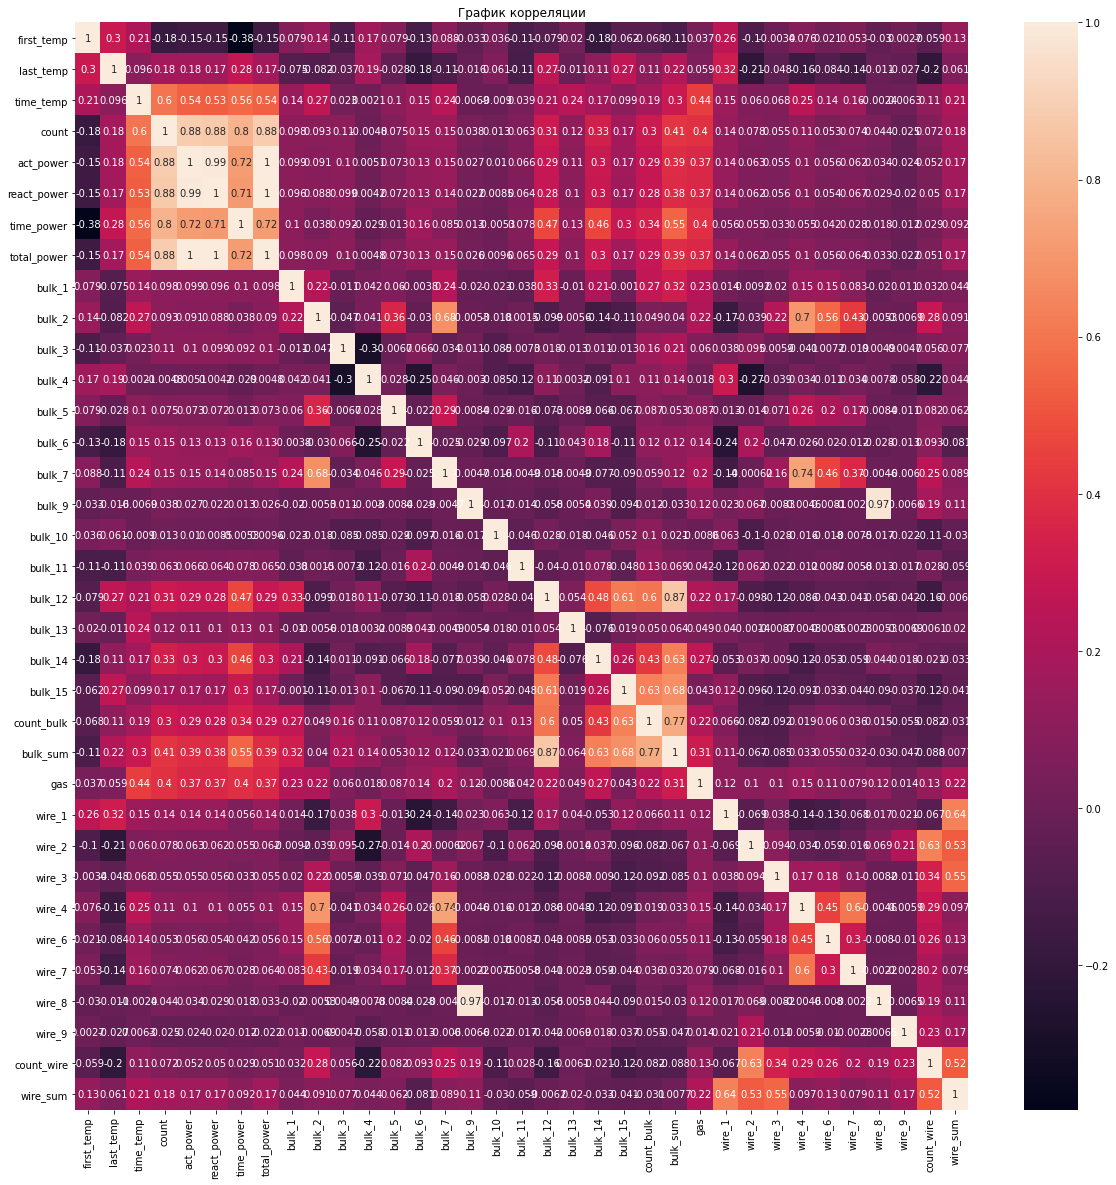

In [62]:
plt.figure(figsize=(20,20));
plt.title('График корреляции');
sns.heatmap(df_total.corr(), annot=True);

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>мержевание - верно!</p>
</div>

In [63]:
date_columns = df_total.select_dtypes('datetime').columns
date_columns

Index(['first_time', 'last_time', 's_time_arc', 'f_time_arc'], dtype='object')

In [64]:
final_df = df_total.drop(date_columns, axis = 1)
final_df = final_df.drop(['act_power','react_power','count_bulk', 'count'], axis = 1)

Удаляем признаки с датами. Так же активную, реактивную мощности и количество действий с одной партией из-за мультиколлениарности с полной мощностью и временем нагрева дугой. 

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА 2</b></u></p>
    <p>принято</p>
</div>

In [65]:
final_df

,first_temp,last_temp,time_temp,time_power,total_power,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,...,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,count_wire,wire_sum
key,,,,,,,,,,,,,,,,,,,,,
1,1571.0,1613.0,1714.0,1098.0,3.718736,0.0,0.0,0.0,43.0,0.0,...,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,60.059998
2,1581.0,1602.0,1265.0,811.0,2.588349,0.0,0.0,0.0,73.0,0.0,...,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,96.052315
3,1596.0,1599.0,1753.0,655.0,5.019223,0.0,0.0,0.0,34.0,0.0,...,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,91.160157
4,1601.0,1625.0,1220.0,741.0,3.400038,0.0,0.0,0.0,81.0,0.0,...,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,89.063515
5,1576.0,1602.0,1536.0,869.0,2.816980,0.0,0.0,0.0,78.0,0.0,...,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,2,98.352796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1570.0,1591.0,1380.0,723.0,3.868721,0.0,0.0,21.0,0.0,0.0,...,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,89.150879
2496,1554.0,1591.0,1705.0,940.0,5.070316,0.0,0.0,0.0,63.0,0.0,...,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1,114.179527
2497,1571.0,1589.0,962.0,569.0,4.360918,0.0,0.0,0.0,85.0,0.0,...,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,2,103.134723


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>принято</p>
</div>

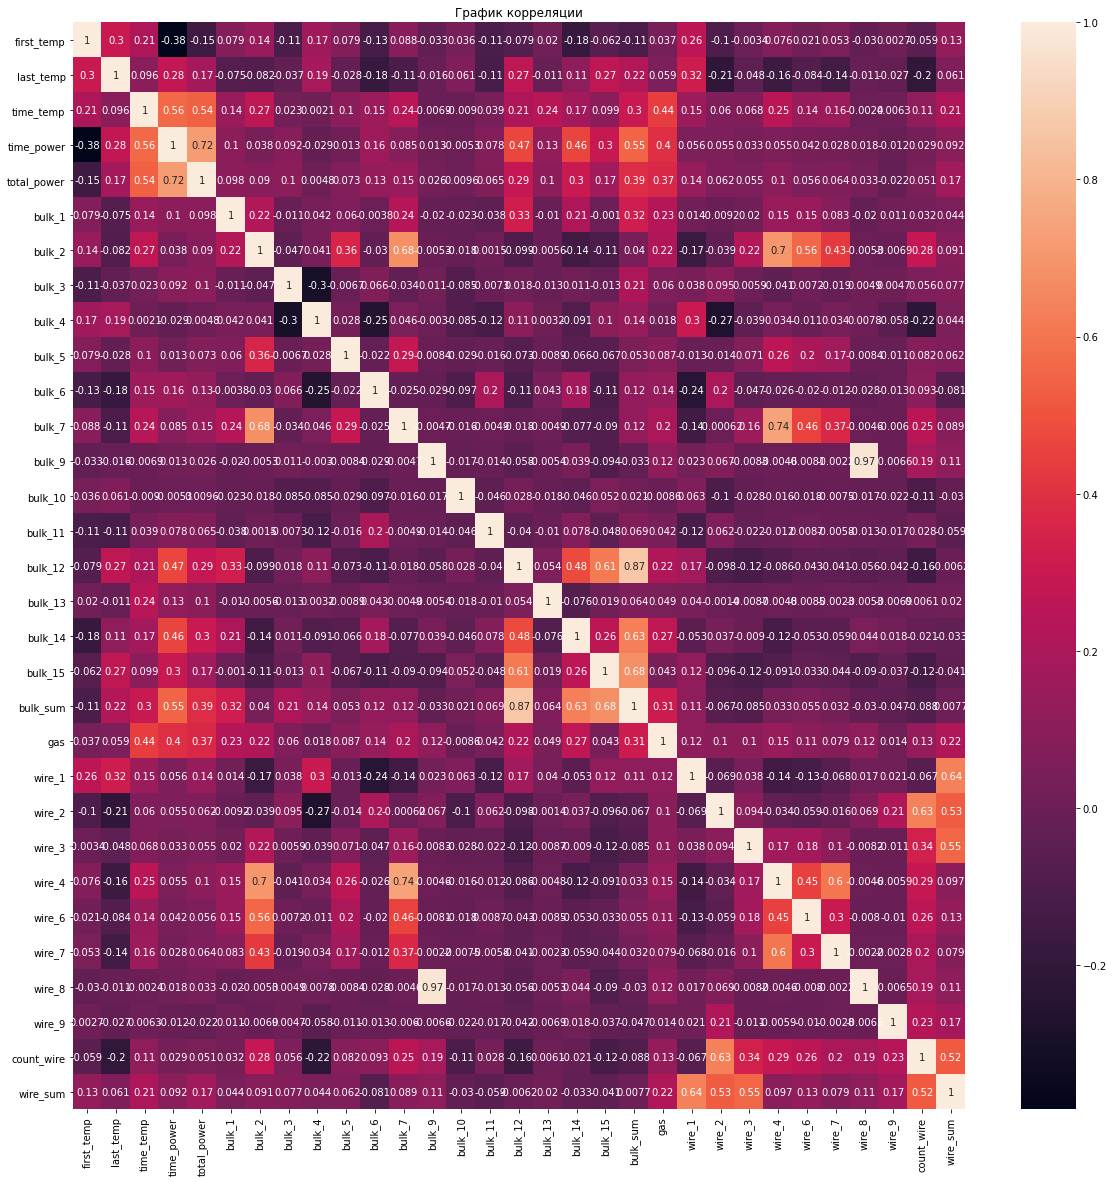

In [66]:
plt.figure(figsize=(20,20));
plt.title('График корреляции');
sns.heatmap(final_df.corr(), annot=True);

Удалены активная мощность и реактивная мощности, т.к. фактически, прямую зависимость от них.  
Так же удален признак содержащий кол-во действий с одной партией, так как время нагрева партии дугой имеет прямую зависимость от кол-ва действий.  

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Вот тут не хватает вывода( Есть показательная аналитика, но что в итоге с мультиколлинеарностью? (корреляция между факторами более 0.9 - явление мультиколлинеарности, от которой лучше избавляться. Убрав из модели один из пары факторов)</p>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА 2</b></u></p>
    <p>Выше всё увидел, ОК.</p>
</div>

## Модель 

In [67]:
features = final_df.drop('last_temp', axis = 1)
target = final_df.last_temp

In [68]:
print(features.shape)
print(target.shape)

(2325, 30)
(2325,)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = RANDOM_STATE)

In [70]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_train = pd.DataFrame(X_train_st, columns=X_train.columns)
X_test_st = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_st, columns=X_train.columns)

1. Поделили на выборки. 
2. Нормальзовали численные признаки. 

# Строим три модели:  #
1. Линейная регрессия 
2. Случайный лес
3. CatBoost  

Так же для подбора лучших параметров используем GridSearchCV.

### LinearRegression

In [71]:
model_lr = LinearRegression()
mae_lr = cross_val_score(model_lr, X_train, y_train, cv=6, scoring='neg_mean_absolute_error')
mae = abs(mae_lr.mean())
print(f' Средний показатль MAE при кросс-валидации: {mae}')

 Средний показатль MAE при кросс-валидации: 5.9616813545773875


<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>первый пошёл) ОК.
Единственное - в линейной регрессии от мультиколлинеарности надо избавляться!    
</p>
</div>

### RandomForest 

In [72]:
model_rf = RandomForestRegressor(random_state=RANDOM_STATE)
rf_param = {
    'n_estimators': [5, 10, 25, 50, 100],
    'max_depth': range(1,11),
    'max_features': ["sqrt", "log2", None],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 3, 4]    
}

In [73]:
gridCV = GridSearchCV(model_rf, rf_param, cv=5, scoring='neg_mean_absolute_error')
gridCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=77),
             param_grid={'max_depth': range(1, 11),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [5, 10, 25, 50, 100]},
             scoring='neg_mean_absolute_error')

In [74]:
print(f'Лучшие параметры: {gridCV.best_estimator_}')
print(f'Лучший показатель: {abs(gridCV.best_score_)}')

Лучшие параметры: RandomForestRegressor(max_depth=10, max_features=None, min_samples_leaf=3,
                      random_state=77)
Лучший показатель: 6.1738399492657665


Получаем лучшие параметры модели.
И лучшее значение МАЕ случайного леса. 

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>второй на месте</p>
</div>

In [75]:
model_rf = RandomForestRegressor(max_depth=10, max_features=None, min_samples_leaf=3, random_state=77)
model_rf.fit(X_train, y_train)

explainer = shap.Explainer(model_rf)
shap_values = explainer(X_test)


Строим график важности признаков влияющих на целевой коказатель.

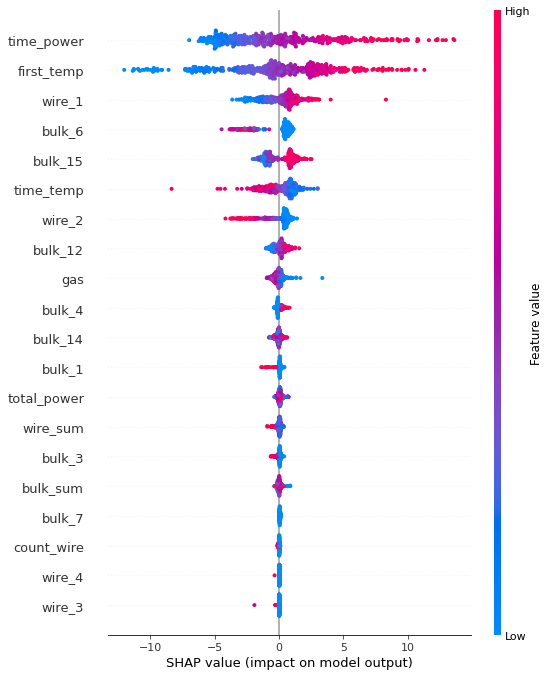

In [76]:
shap.summary_plot(shap_values, X_test)

Важными признаками для нашего целевого признака в случайном лесу явлются: время нагрева стрежней, начальная температура и некоторые виды добавок (wire_1, bulk_6 и bulk_15), а так же время между первым и последним замером температуры. 


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>SHAP - отлично. Его можно применять на тесте уже только).</p>
</div>

### CatBoost

In [77]:
model_cat = CatBoostRegressor(verbose=False)
params_cat = {
    'loss_function':['MAE'],
    'depth': [5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 400], 
    'random_state': [RANDOM_STATE]
}
grid_cat = GridSearchCV(model_cat, params_cat, cv=4, scoring='neg_mean_absolute_error')


In [78]:
grid_cat.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostRegressor object at 0x7feea901a910>,
             param_grid={'depth': [5, 7, 10],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'loss_function': ['MAE'],
                         'n_estimators': [100, 200, 300, 400],
                         'random_state': [77]},
             scoring='neg_mean_absolute_error')

In [79]:
print(f'Лучшие параметры: {grid_cat.best_params_}')
print(f'Лучший показатель: {abs(grid_cat.best_score_)}')

Лучшие параметры: {'depth': 5, 'learning_rate': 0.1, 'loss_function': 'MAE', 'n_estimators': 400, 'random_state': 77}
Лучший показатель: 5.982551022526439


Получили лучшие параметры и луший показатель МАЕ для модели. 

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Принципиально по модели - ОК. НО!!!<br>
Модели выше проверялись с помощью кросс-валидации. А эта - БЕЗ, просто по формуле. Поэтому, на кэтбусте получилась метрика завышенная. Не совсем корректно српавнивать её с другими. Тут тоже надо сделать её через кросс-валидацию тогда)    
</p>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА 2</b></u></p>
    <p>Отлично, теперь всё сравнимо!</p>
</div>

In [80]:
model_cat = CatBoostRegressor(depth = 5,
                              learning_rate = 0.1, 
                              loss_function = 'MAE',
                              n_estimators = 400,
                              random_state = 77)
model_cat.fit(X_train, y_train)

explainer = shap.Explainer(model_cat)
shap_values = explainer(X_test)

0:	learn: 7.9620420	total: 2.6ms	remaining: 1.03s
1:	learn: 7.8229560	total: 5.27ms	remaining: 1.05s
2:	learn: 7.6969737	total: 7.74ms	remaining: 1.02s
3:	learn: 7.5916293	total: 9.98ms	remaining: 988ms
4:	learn: 7.4526335	total: 12.4ms	remaining: 976ms
5:	learn: 7.3355007	total: 14.9ms	remaining: 978ms
6:	learn: 7.1883095	total: 17.2ms	remaining: 968ms
7:	learn: 7.0959758	total: 19.6ms	remaining: 961ms
8:	learn: 7.0031219	total: 21.9ms	remaining: 951ms
9:	learn: 6.9345872	total: 24ms	remaining: 937ms
10:	learn: 6.8699428	total: 26.3ms	remaining: 930ms
11:	learn: 6.7839999	total: 28.6ms	remaining: 925ms
12:	learn: 6.7169229	total: 30.8ms	remaining: 916ms
13:	learn: 6.6722864	total: 32.9ms	remaining: 907ms
14:	learn: 6.5824501	total: 35.2ms	remaining: 904ms
15:	learn: 6.5243172	total: 37.5ms	remaining: 899ms
16:	learn: 6.4842778	total: 39.7ms	remaining: 895ms
17:	learn: 6.4548594	total: 42.1ms	remaining: 893ms
18:	learn: 6.4060988	total: 44.3ms	remaining: 888ms
19:	learn: 6.3459831	tota

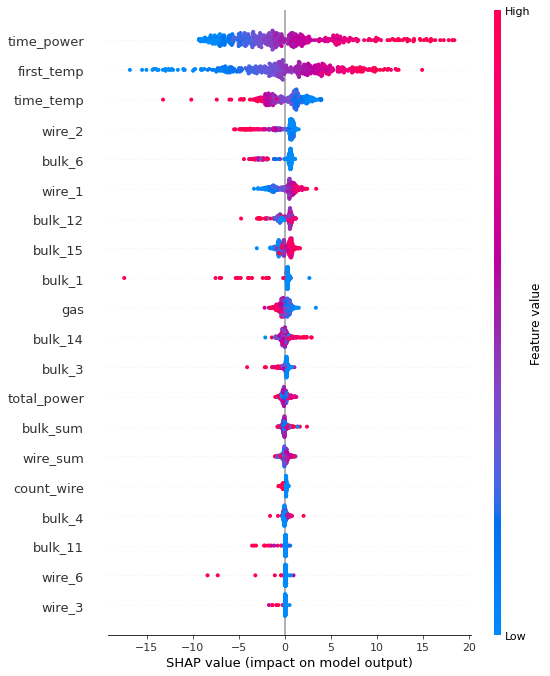

In [81]:
shap.summary_plot(shap_values, X_test)

Так же как и в случайном лесу важными параметрами оказались время нагрева стрежней, начальная температура, время между первым и последним замером температуры и некоторые виды добавок (wire_1, wire_2, bulk_6).

## Проверка LinearRegression и CatBoost на тестовой выборке

In [82]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
print(f'Показатель MAE LinearRegression на тестовой выборке: {round(mean_absolute_error(y_test, pred_lr), 2)}')

pred = model_cat.predict(X_test)
print(f'Показатель MAE CatBoost на тестовой выборке: {round(mean_absolute_error(y_test, pred), 2)}')

Показатель MAE LinearRegression на тестовой выборке: 6.05
Показатель MAE CatBoost на тестовой выборке: 5.73


LinearRegression и CatBoost показали почти одинаковый результат. Поэтому решено проверить на тестовой выборке обе модели.


<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ МЕНТОРА 2</b></u></p>
    <p>
Всё же тестируем ТОЛЬКО одну лучшую. Тут какова идея: на трайне ищем лучшую модель Решаемся на неё. А на тесте - ПРОВРЕЯМ, т.е. убеждаемся в своём выборе.    
</p>
</div>

## Вывод:

1. Работа с данными:
    * Был проведен анализ и предобработка данных.
    * Созданны новые признаки.
    * Данные объедененны в одну таблицу по номеру партии.   
2. Работа с моделями:
    * Изучены три модели и получены значения нужной метрики МАЕ на тренировочной выборке при кросс-валидции:
        1. LinearReggression - 5.96
        2. RandomForest - 6.17
        3. CatBoost - 5.98
    * Т.к. у LinearReggression и CatBoost значение МАЕ примерно одинаковые, то решено проверить на тестовой выборке обе модели.
    
Итог: При проверке моделей на тестовой выборке лучше себя показал CatBoost со значением МАЕ = 5.73, что не превышает границу заявленного МАЕ = 6.8. Так что модель считаю адекватной и пригодной к применению. 

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
ОК, Владислав, скажу, ещё один уверненный шаг к финалу этой истории!<br>
Обработка данных, модельная работа, конечные результаты - многое удалось как надо<br> Очень здорово, что сразу ищешь новые фичи, думаешь над ними, анализируешь. Это тот самый подход, который нужен, чтобы искать ту саму модель для заказчика)<br> Осталось лишь несколько вопросов с моей стороны))<br>
<font color='red'>    
1) При моделировании существует проблематика мультиколлинеарности.(когда количественные факторы модели имеют сильную корреляцию друг с другом - больше 0.9).Есть ли она у нас?  Если есть - надо  решать по понятиям:) (удалить лишнее)<br><br>

2) и есть комментарий по метрике на кэтбусте. (Анализ важности можно провести только на тесте)<br>
    
3) Плюс по выбросам)<BR>
    
4) И код не пошёл((<br>
    
<font color='green'>
<font color='green'>
Однозначно видно, что ты технически сделал хорошую работу.<br>
Осталось не много)<br>

Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА 2</b></u></p>
Привет, Владислав. Теперь точно можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.<br>Увидел твои комментари/коорректировки. ОК.<br>
 
Всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
   
В общем-то, вопросов у меня больше и нет особых)<br>
Возможно, что у тебя остались/появились?

Нет, вопросов больше нет. Спасибо за ревью)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА 3</b></u></p>
    
ОК, Владислав. Тогда всё на этом.<br>

Далее скажу, на правах ментора, вот что хотел бы сказать:<br>
Пройден большой путь. Со своими коcогорами и равнинами, медианами и дисперсиями)<br>
Умение аналитически мыслить, писать красивый код, эффективно автоматизировать расчёты, видеть задачи бизнеса через призму моделирования - вот то основное, что  останется у тебя важного после нашей школы. А дальше - только взращивать посеянные зёрна и укреплять свои скилы.<br><br>
Если говорить о развитии дополнительных компетенций, рекомендовал бы ещё глянуть такие области знаний:<br>
1) Организация проектов по проведению моделирования (например Методология CRISP-DM (Cross-Industry Standard Process)<br>
2) Умения системно подходить к решению аналитической задачи. (например методология ТРИЗ, системный анализ)<br>
3) Если в промышленности будут проекты, то рекоммендовал бы освоить  "Статистичекий контроль качества (SPC)"<br>
4) Ещё важный навык: перевод результататов моделирования на язык бизнеса. Т.е. понимание, как целевые показатели моделей влияют на финансовую выгоду заказчика.<br>

Каждого из нас (и меня в том числе) можно оценивать с нескольких сторон, как специалиста.<br>
1) Умение анализировать, "вгрызание" в данные, в задачу.<br>
2) Знание мат.части: методы, подходы к решению - всё, что по программе заложено<br>
3) Кодовая часть: умение писать эффективный код.<br>
4) Работа с графикой. (умение хорошо ыизуализировать)<br>
И при рабочей деятельности (устраивание на работу/ улучшение карьеры) на важно понимать свои слабые/сильные стороны по этим направлениям. И опираться на них при ведении переговоров и выстраивании дальнейшего совершенствования.<br><br>    
    
Спасибо за этот труд и за совместную работу на других проектах)<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br> 